# 변동성과 리스크 (Volatility and Risk)

변동성은 일반적으로 표준편차인 평균으로부터의 편차 제곱들의 평균으로 측정됩니다.

이전 시간에 작업한 수익률 샘플을 읽어와보도록 하겠습니다.

In [1]:
import pandas as pd
prices = pd.read_csv("data/sample_prices.csv")
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


첫 번째 열은 `NaN`입니다. 이는 판다스가 값이 존재하지 않음(N/A)이라고 말하는 방식입니다. 우리는 `.dropna()` 메서드를 사용하여 해당 행을 삭제할 수 있습니다.

In [2]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


이제 표준 편차를 계산해 보겠습니다.

In [3]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

import numpy as np

volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

판다스에 내장된 `.std()` 메소드를 사용해도 같은 결과가 나오는지 확인해보겠습니다.

In [4]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

어라, 왜 일치하지 않을까요? 기본적으로 `.std()` 메서드는 $n-1$의 분모를 사용하는 표본 표준편차(_sample standard deviation_)를 계산하기 때문입니다. 반면에 우리는 $n$의 분자를 사용하는 모집단 표준편차(_population standard deviation_)를 계산했습니다. 관찰된 수익률은 당연히 표본으로 간주되기 때문에 $n-1$의 분모를 사용하는 것이 더 적절할 것이므로 동일한 숫자를 얻는지 확인하기 위해 계산을 다시 실행해 보겠습니다.

관측치의 개수를 얻기 위해 행 개수와 열 개수로 구성된 튜플을 반환하는 데이터프레임의 `.shape` 속성을 사용할 수 있습니다.

In [5]:
returns.shape

(12, 2)

리스트에서처럼 우리는 0부터 시작하는 인덱스를 사용하여 튜플의 요소에 액세스할 수 있습니다. 따라서 데이터프레임의 행 개수를 얻으려면 튜플의 0번째 요소를 추출하면 됩니다.

In [6]:
number_of_obs = returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [7]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

# 변동성 연율화하기 (Annualizing Volatility)

변동성을 연율화하기 위해서는 관측 기간 수의 제곱근으로 스케일링합니다.

따라서 월별 시리즈의 변동성을 연율화하기 위해서는 12의 제곱근을 곱합니다. `np.sqrt()`를 사용하는 대신 $0.5$의 거듭제곱을 할 수도 있습니다.

In [8]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

# 위험 조정 수익률 (Risk Adjusted Returns)

이제는 임의의 샘플 데이터가 아닌 실제 데이터를 가지고 작업을 해보겠습니다. 시가 총액을 기준으로 구분지어진 10개의 포트폴리오 월별 수익률 데이터를 가져오겠습니다. 우리는 이 10개의 포트폴리오 중 시총 기준으로 가장 큰 포트폴리오와 가장 작은 포트폴리오만을 살펴보고자 합니다.

In [9]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [10]:
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


데이터는 이미 백분율(예: 0.045 대신 4.5)로 표시되어 있기 때문에 파일의 원데이터를 100으로 나누어야 합니다.

In [11]:
returns = returns/100

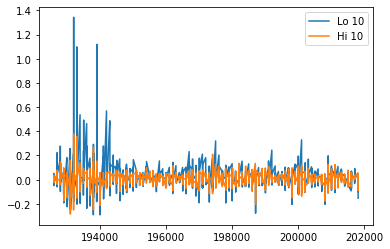

In [12]:
returns.plot()

In [13]:
returns.columns = ['SmallCap', 'LargeCap']

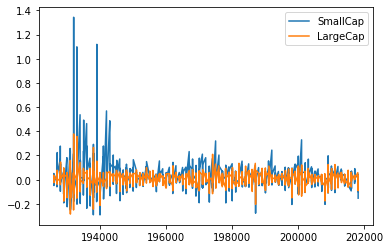

In [14]:
returns.plot()

In [15]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

이제 다음과 같이 연율화된 수익을 계산할 수 있습니다.

In [16]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [17]:
annualized_return = (return_per_month + 1)**12-1

In [20]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

대표적인 위험 조정 수익률 지표인 샤프 비율은 연율화된 수익률을 연율화된 변동성으로 나누어 계산합니다.

In [21]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

만약 무위험수익률이 0이 아니라면 우리는 다음과 같은 공식을 통해 샤프비율을 계산할 수 있습니다.

$$Sharpe Ratio = \frac{Ann. Return - Riskfree Rate}{Ann. Vol}$$

In [22]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64